In [1]:
import funkcje_pischarnik as f
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt




KeyboardInterrupt: 

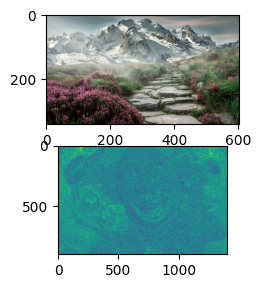

In [2]:
import matplotlib.pyplot as plt


plt.subplot(3, 1, 1)
plt.imshow(io.imread('../resources/mountain.jpg'))

a  = f.encrypt('../resources/shrek.jpg')

plt.subplot(3, 1, 2)
plt.imshow(a)

b = f.decrypt(a)


plt.subplot(3, 1, 3)
plt.imshow(b)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


(1, 1260000, 3)


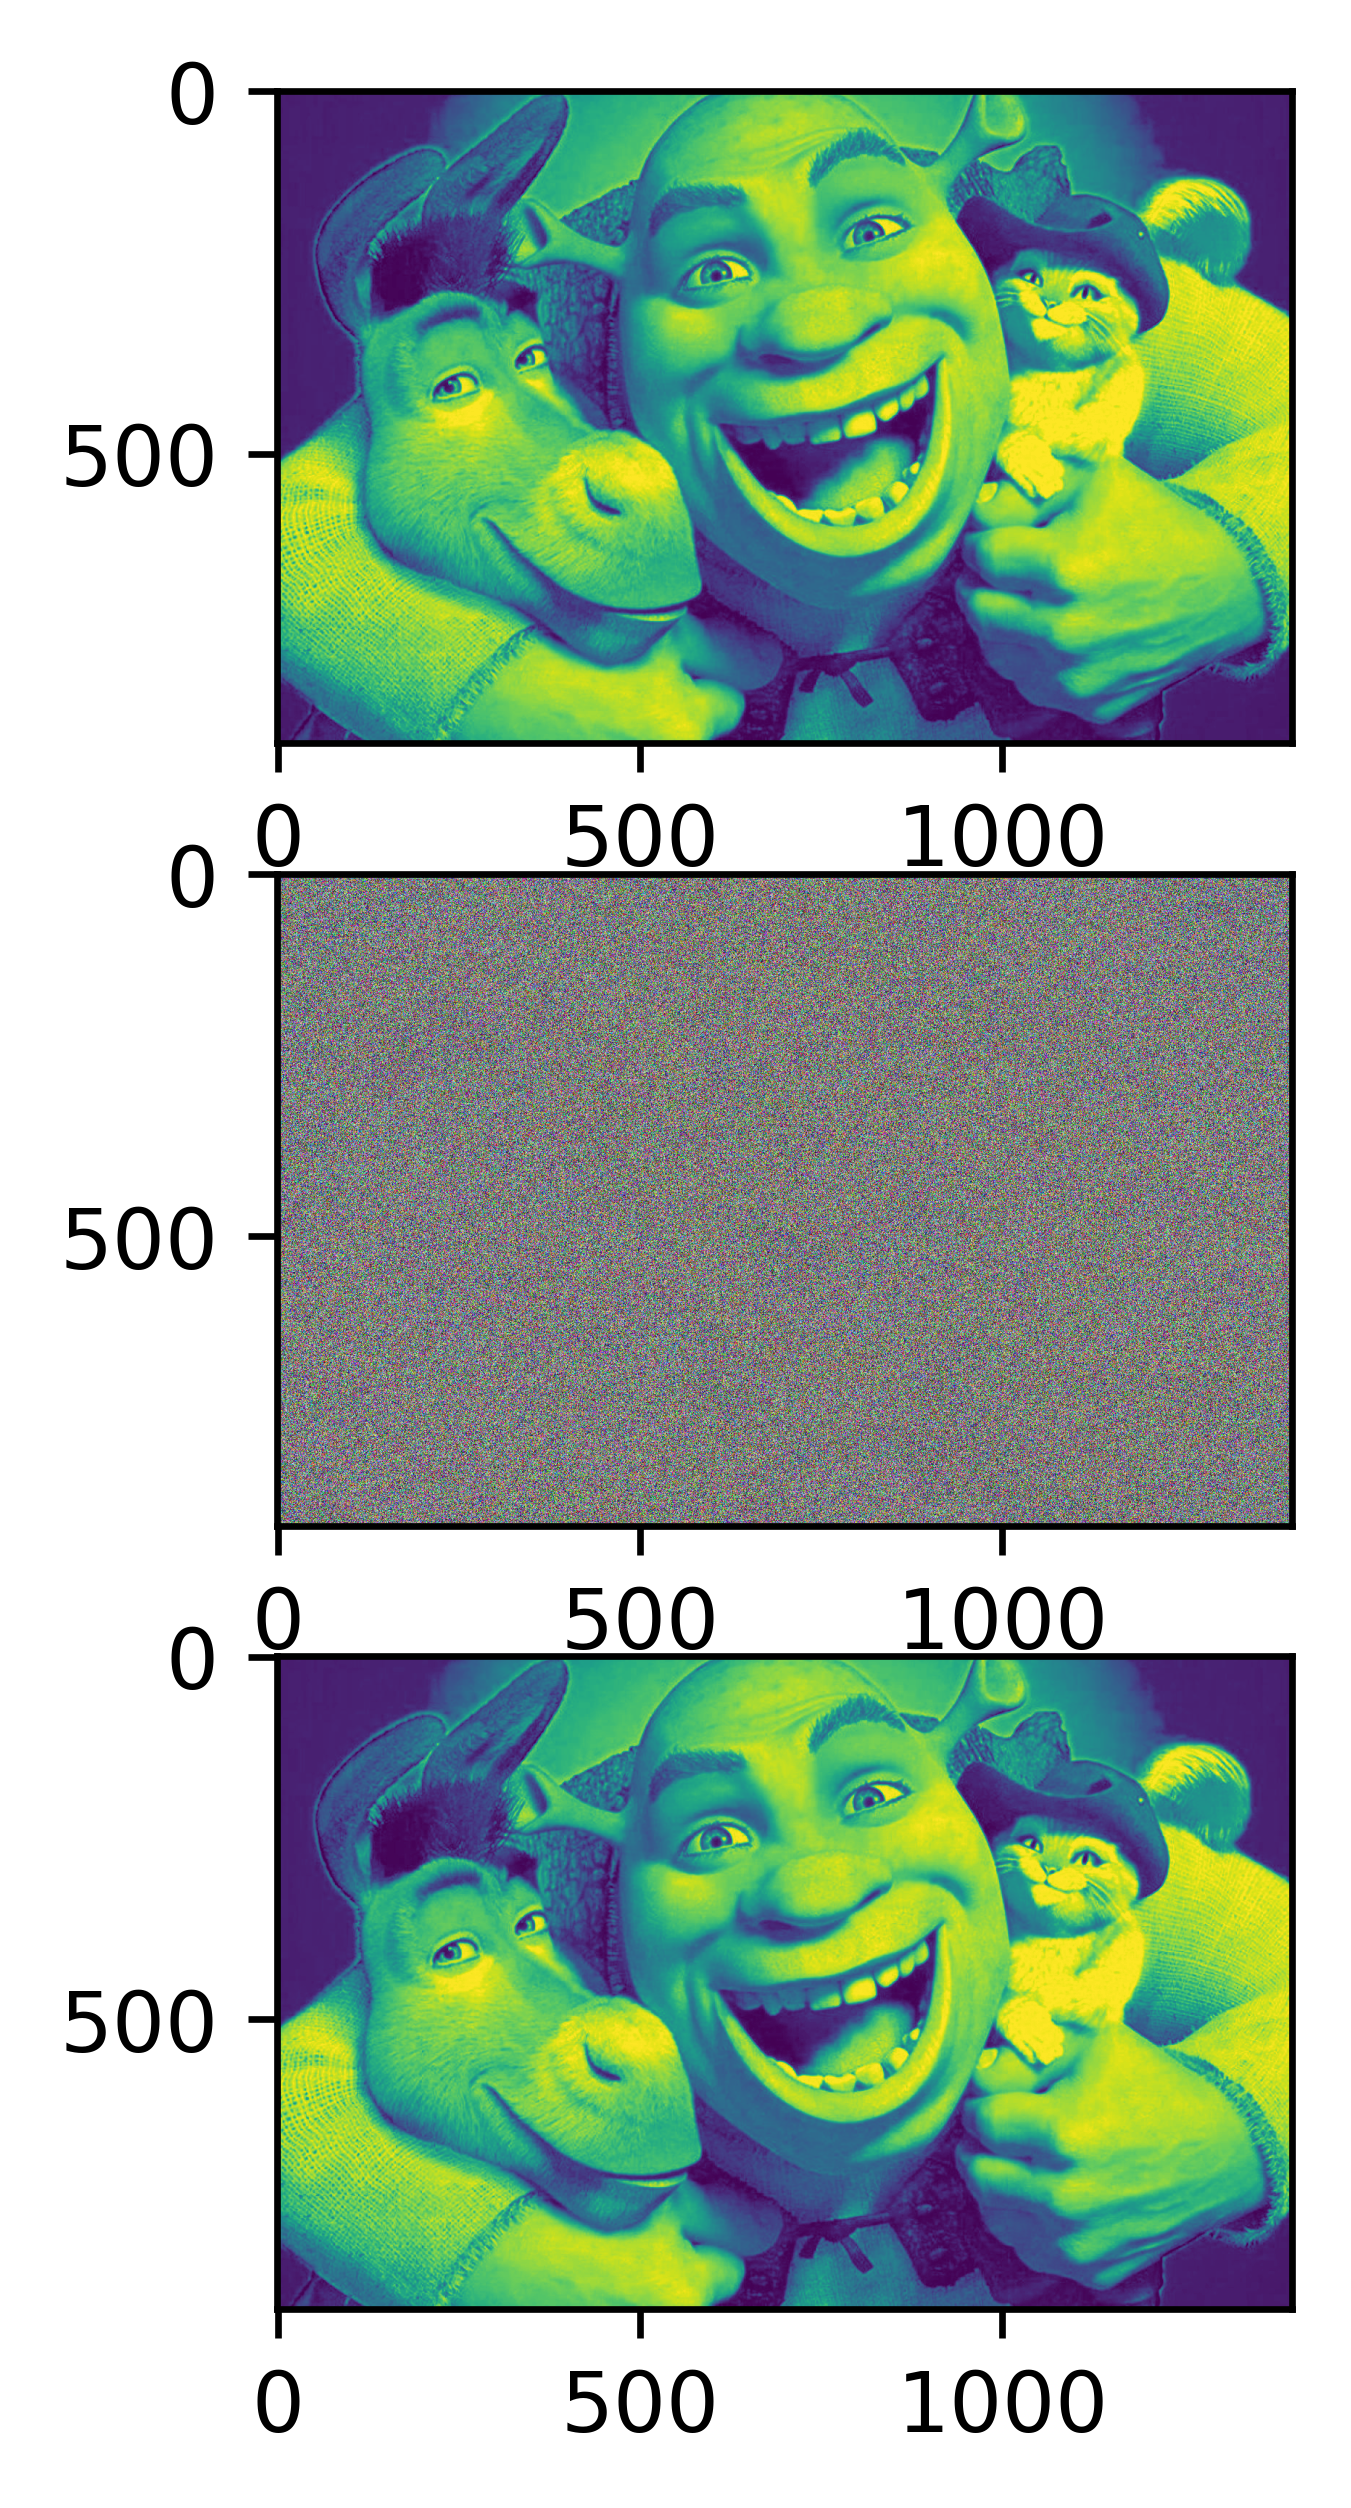

In [11]:



img = io.imread('../resources/shrek.jpg')

plt.figure(dpi = 600)
plt.subplot(3, 1, 1)
plt.imshow(img[...,0])

x, y, z = img.shape
img = img.reshape(x*y, z)

red = img[...,0]
green = img[..., 1]
blue = img[..., 2]

maks = 0.975
mini = 0.095062
iter_j = 2
iter_i = 50
a = 3.9

red_c = f.x_c(mini, f.dx(maks, mini), red)
green_c = f.x_c(mini, f.dx(maks, mini), green)
blue_c = f.x_c(mini, f.dx(maks, mini), blue)



red_norm = np.copy(red_c)
green_norm = np.copy(green_c)
blue_norm = np.copy(blue_c)
for i in range(iter_j):

    red_norm = f.normalise(red_norm, maks, mini)
    red_norm = f.iterations(red_norm, iter_i, a, maks)

for i in range(iter_j):

    green_norm = f.normalise(green_norm, maks, mini)
    green_norm = f.iterations(green_norm, iter_i, a, maks)
for i in range(iter_j):

    blue_norm = f.normalise(blue_norm, maks, mini)
    blue_norm = f.iterations(blue_norm, iter_i, a, maks)


obraz = np.dstack((red_norm, green_norm, blue_norm))

print(obraz.shape)

plt.subplot(3, 1, 2)
plt.imshow(obraz.reshape(x, y, 3))
io.imsave('3_1.png', obraz.reshape(x, y, 3))

red_inv = np.copy(red_norm)
for i in range(iter_j):
    red_inv = f.reverse_iterations(red_inv, iter_i, a, maks, mini)
    red_inv = f.reverse_normalise(red_inv, maks, mini)



red = f.x_c_reverse(mini, f.dx(maks, mini), red_inv)


plt.subplot(3, 1, 3)
plt.imshow(red.reshape(x, y))



